# Importing the necessary libraries

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_parquet('train-00000-of-00001.parquet')

1. Parquet is a columnar storage file format

2. Unlike row-based formats (like CSV or JSON), Parquet stores data in a columnar format. This means that data for each column is stored together, which can significantly improve read performance for analytical queries that only access a subset of columns.

# Data/Text Pre-processing

In [3]:
# read what's data looks like
df.head()

,text,label
0,i feel awful about it too because it s my job ...,0
1,im alone i feel awful,0
2,ive probably mentioned this before but i reall...,1
3,i was feeling a little low few days back,0
4,i beleive that i am much more sensitive to oth...,2


In [4]:
# Read data shape
df.shape

(416809, 2)

In [5]:
# Read unique values present in the label variable
df['label'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [6]:
# check the count of values in label variable
df['label'].value_counts()

label
1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: count, dtype: int64

In [7]:
# make a new variable that takes the length of each message 
df['text_len'] = df['text'].apply(len)

> Remove Stopwords from Data

> Remove stopwords so we can identify sentiments of what each value of label variable represent.

In [8]:
# import the natural language toolkit library
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#Download the stopwords
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\X\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\X\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\X\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
#make a function to remove stop_words
def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

In [ ]:
#Apply the fuction and make a new variable
df['filtered text'] = df['text'].apply(remove_stop_words)

> Generate a wordcloud for each label

In [12]:
# import wordcloud 
from wordcloud import WordCloud

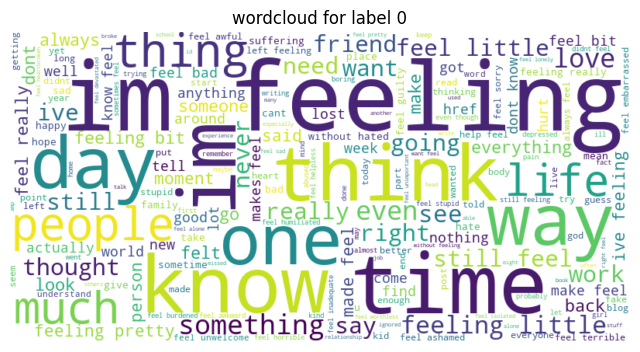

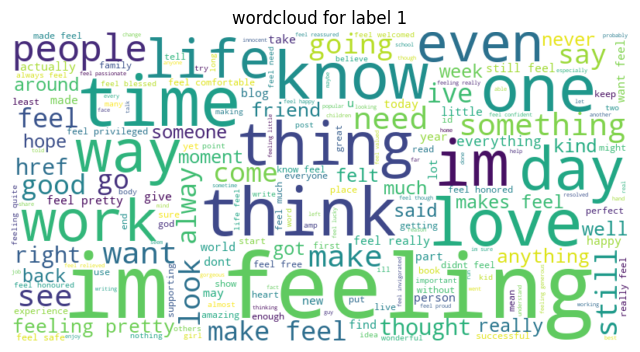

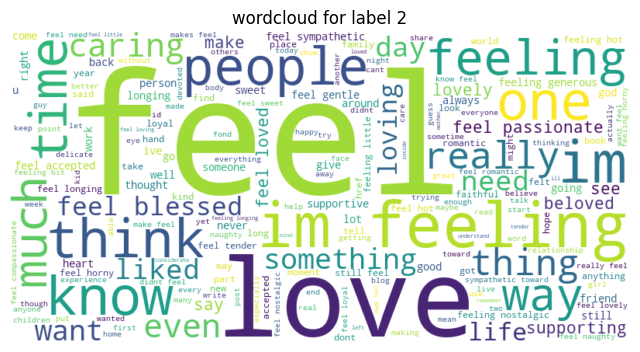

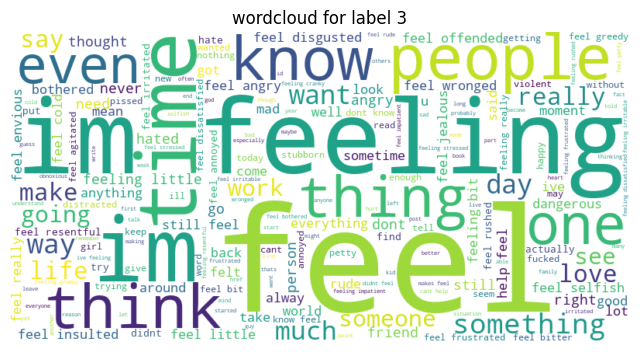

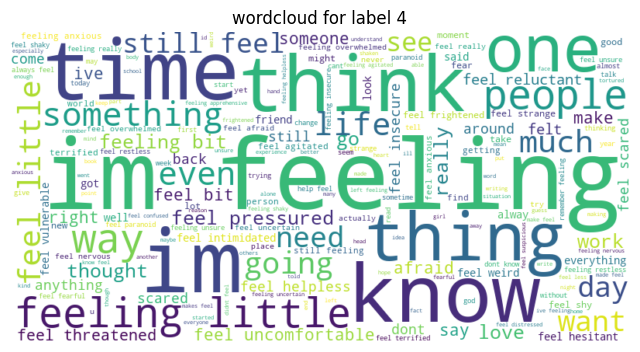

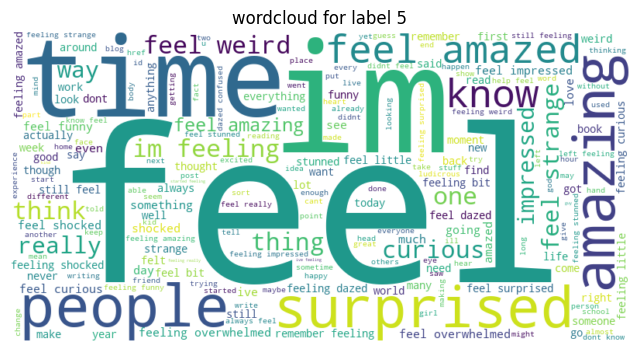

In [13]:
# generate a wordcloud to visualize the word frequencies and to note what value in 'label variable' represents as a sentiment 
for label in df['label'].unique():
    text = ' '.join(df[df['label'] == label]['filtered text'])
    wordcloud = WordCloud(height=400, width=800, background_color='white').generate(text)
    

    plt.figure(figsize=(8,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'wordcloud for label {label}')
    plt.show()

- Make a new Variable name `Sentiment` which will hold the sentiment of the text.

In [14]:
# Use textblob library to know the polarity of sentiments
from textblob import TextBlob

In [15]:
df['sentiments'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

- `-1` indicates negative sentiment
- `0` indicates neutral sentiment
- `1` indicates positive sentiment

In [16]:
df.head()

,text,label,text_len,filtered text,sentiments
0,i feel awful about it too because it s my job ...,0,112,feel awful job get position succeed happen,-1.000000
1,im alone i feel awful,0,21,im alone feel awful,-1.000000
2,ive probably mentioned this before but i reall...,1,152,ive probably mentioned really feel proud actua...,0.284091
3,i was feeling a little low few days back,0,40,feeling little low days back,-0.096875
4,i beleive that i am much more sensitive to oth...,2,99,beleive much sensitive peoples feelings tend c...,0.243750


In [17]:
#make a function to identify sentiments more fastly
def sentiment_analyzer(text):
    if text > 0:
        return "Positive"
    elif text == 0:
        return "Neutral"
    else:
        return "Negative"

In [18]:
df['sentiment'] = df['sentiments'].apply(sentiment_analyzer)

In [19]:
df.head()

,text,label,text_len,filtered text,sentiments,sentiment
0,i feel awful about it too because it s my job ...,0,112,feel awful job get position succeed happen,-1.000000,Negative
1,im alone i feel awful,0,21,im alone feel awful,-1.000000,Negative
2,ive probably mentioned this before but i reall...,1,152,ive probably mentioned really feel proud actua...,0.284091,Positive
3,i was feeling a little low few days back,0,40,feeling little low days back,-0.096875,Negative
4,i beleive that i am much more sensitive to oth...,2,99,beleive much sensitive peoples feelings tend c...,0.243750,Positive


In [20]:
df['sentiment'].value_counts()

sentiment
Positive    199953
Negative    135170
Neutral      81686
Name: count, dtype: int64

In [21]:
# Import Counter func. from collections module
from collections import Counter

C:\Users\X\AppData\Local\Temp\ipykernel_268\608022598.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(word), palette="Blues_d")


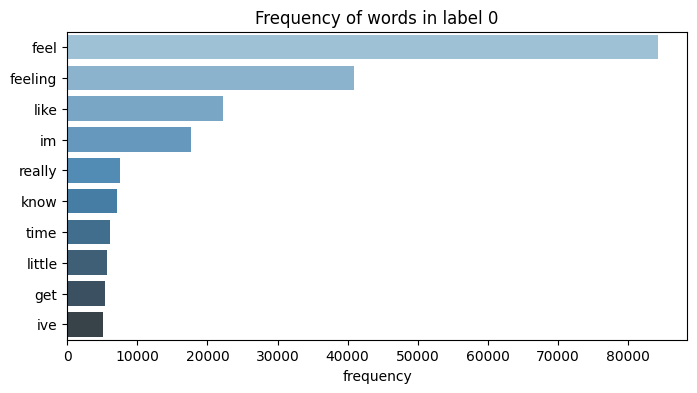

C:\Users\X\AppData\Local\Temp\ipykernel_268\608022598.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(word), palette="Blues_d")


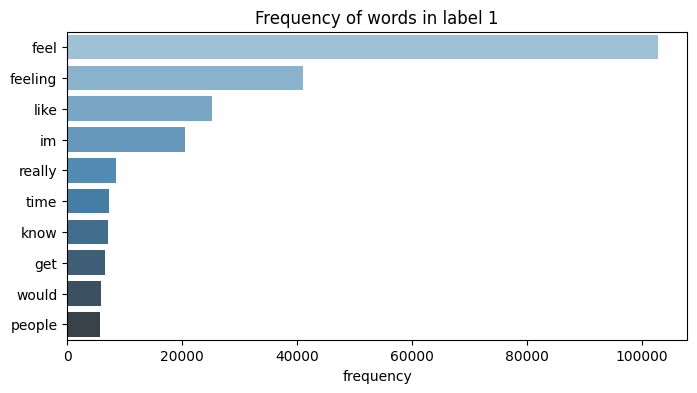

C:\Users\X\AppData\Local\Temp\ipykernel_268\608022598.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(word), palette="Blues_d")


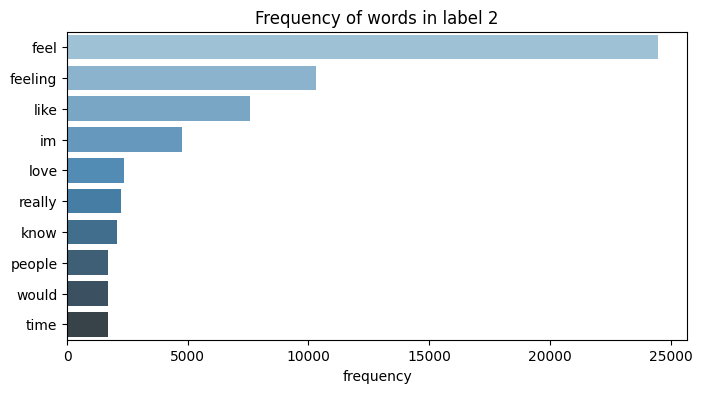

C:\Users\X\AppData\Local\Temp\ipykernel_268\608022598.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(word), palette="Blues_d")


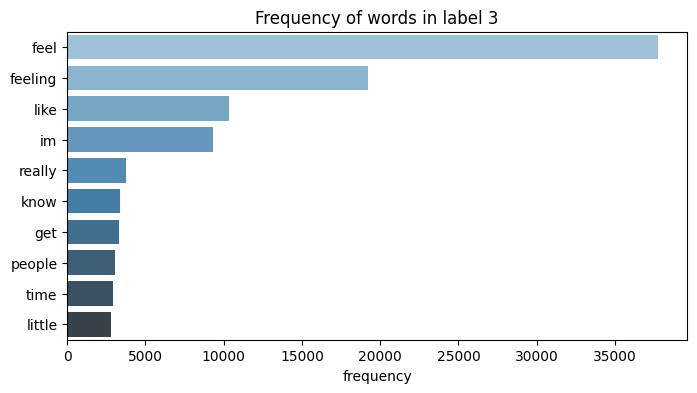

C:\Users\X\AppData\Local\Temp\ipykernel_268\608022598.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(word), palette="Blues_d")


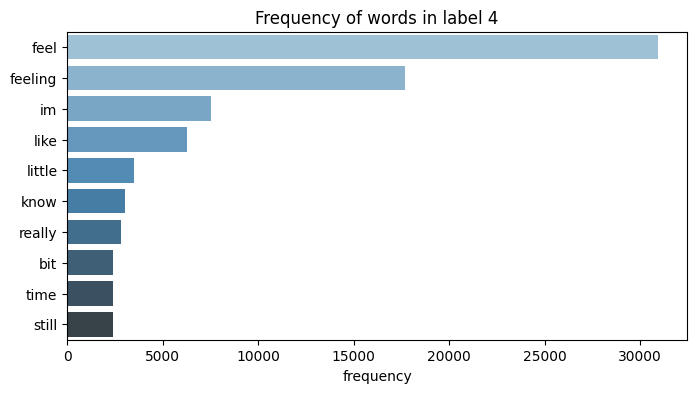

C:\Users\X\AppData\Local\Temp\ipykernel_268\608022598.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(word), palette="Blues_d")


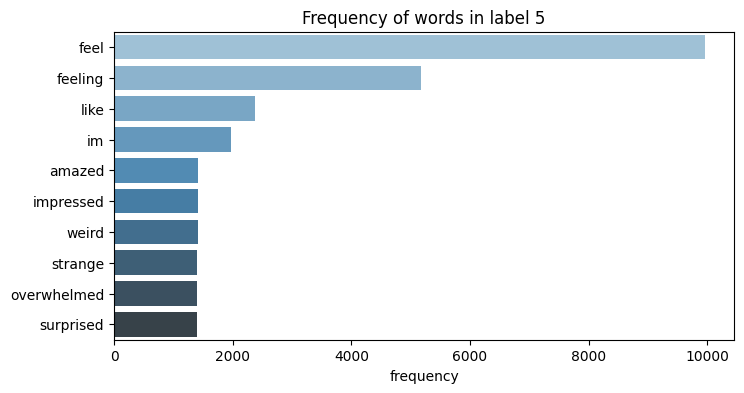

In [22]:
#Using for loop, make a barplot to see words frequencies corresponding to their label
for label in df['label'].unique():
    text = " ".join(df[df['label'] == label]['filtered text']).split()
    most_common = Counter(text).most_common(10)
    word, counts = zip(*most_common)

    plt.figure(figsize=(8,4))
    sns.barplot(x=list(counts), y=list(word), palette="Blues_d")
    plt.title(f"Frequency of words in label {label}")
    plt.xlabel('frequency')
    plt.show()


> Use CountVectorizer to analyse the Bi-grams and Tri-grams words frequency 

In [23]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
# define a function to display the most common bigram-words
def plot_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]
    words, count = zip(*words_freq)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(count), y=list(words), hue=list(words), legend=False )
    plt.title('Top 10 Bigrams')
    plt.xlabel('Frequency')
    plt.show()

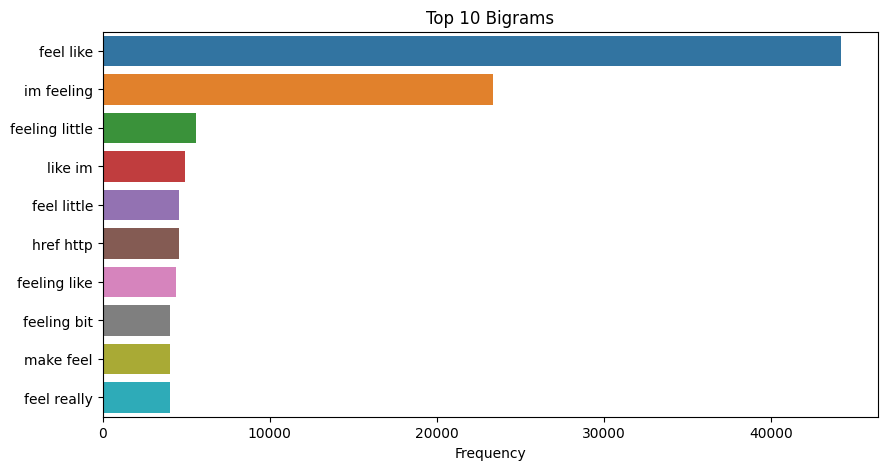

In [26]:
#PLot Bigrams(combination of two words)
plot_top_ngrams(df['filtered text'], n=10)

C:\Users\X\AppData\Local\Temp\ipykernel_268\187568302.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='cividis')


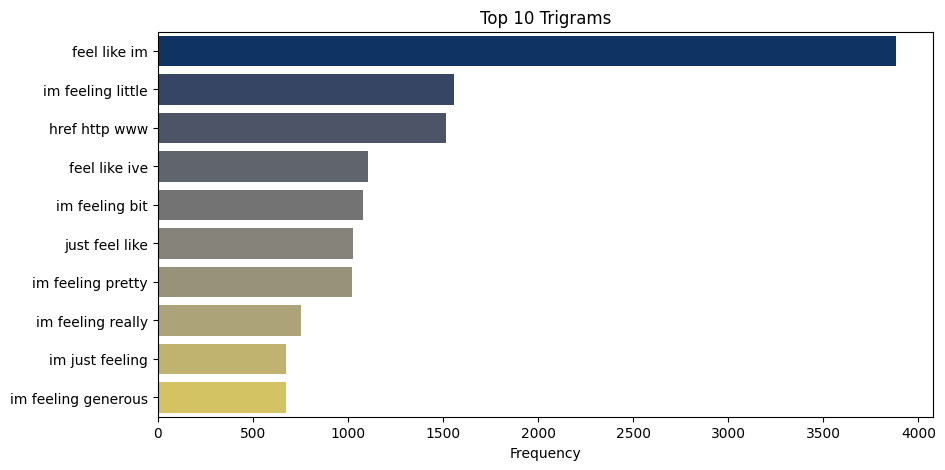

In [27]:
# plot trigrams(combination of three words)
def plot_top_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]
    words, counts = zip(*words_freq)
    
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(counts), y=list(words), palette='cividis')
    plt.title('Top 10 Trigrams')
    plt.xlabel('Frequency')
    plt.show()

plot_top_trigrams(df['text'], n=10)

> To know how many syllables do we have in our text column we can use the following code

In [39]:
# !pip install textstat
from textstat import syllable_count

C:\Users\X\AppData\Local\Temp\ipykernel_268\1166198629.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='label', y='syllable count', palette='Set2')


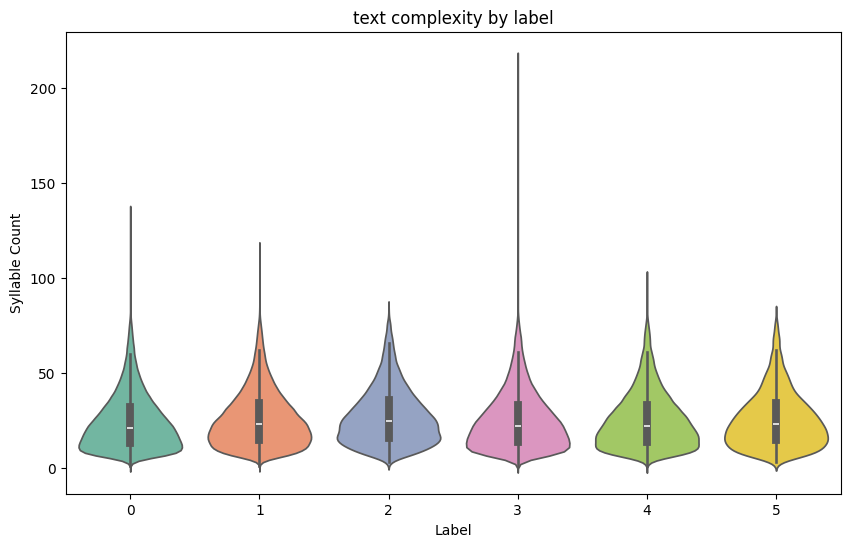

In [40]:
df['syllable count'] = df['text'].apply(syllable_count)
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='label', y='syllable count', palette='Set2')
plt.title('text complexity by label')
plt.xlabel('Label')
plt.ylabel('Syllable Count')
plt.show()

> With the following code: We are trying to understand the readability difficulty of text 

In [ ]:
# import flesch_reading_ease to understand text readability
from textstat import flesch_reading_ease

In [ ]:
# make a new variable with the name of `text readability`
df['text readability'] = df['text'].apply(flesch_reading_ease)

In [44]:
df.head()

,text,label,text_len,filtered text,sentiments,sentiment,syllable count,text readability
0,i feel awful about it too because it s my job ...,0,112,feel awful job get position succeed happen,-1.000000,Negative,32,78.93
1,im alone i feel awful,0,21,im alone feel awful,-1.000000,Negative,6,100.24
2,ive probably mentioned this before but i reall...,1,152,ive probably mentioned really feel proud actua...,0.284091,Positive,43,44.07
3,i was feeling a little low few days back,0,40,feeling little low days back,-0.096875,Negative,11,96.18
4,i beleive that i am much more sensitive to oth...,2,99,beleive much sensitive peoples feelings tend c...,0.243750,Positive,26,70.13


# Building & Choosing a right model

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [46]:
# Assuming 'text' column contains the tweet text and 'sentiment' column contains the sentiment label
X = df['text']
y = df['sentiment']

In [47]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Convert text data to numerical features using TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

##### 1. ***(TF-IDF)***: The text data is converted into numerical features using TF-IDF vectorization. This allows the models to learn from the text data and make predictions

In [49]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

#Train the model 
dt_classifier.fit(X_train_vec, y_train)

# Make predictions on the test data
dt_y_pred = dt_classifier.predict(X_test_vec)

In [50]:
# KNN Classifier
knn_classifier = KNeighborsClassifier()

# Train the KNN Classifier
knn_classifier.fit(X_train_vec, y_train)

# Make predictions on the test data
knn_y_pred = knn_classifier.predict(X_test_vec)

In [51]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier()

#Train  the RF-Classifier
rf_classifier.fit(X_train_vec, y_train)

# Predicting the Test data results
rf_y_pred = rf_classifier.predict(X_test_vec)

In [52]:
#  Define a function to Evaluate the models

def evaluate_model(y_true, y_pred):
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred, average='weighted')
  recall = recall_score(y_true, y_pred, average='weighted')
  f1 = f1_score(y_true, y_pred, average='weighted')
  print(classification_report(y_true, y_pred))
  return accuracy, precision, recall, f1

In [53]:
print("Decision Tree Classifier:")
dt_accuracy, dt_precision, dt_recall, dt_f1 = evaluate_model(y_test, dt_y_pred)
print(f"Accuracy: {dt_accuracy:.4f}, Precision: {dt_precision:.4f}, Recall: {dt_recall:.4f}, F1-Score: {dt_f1:.4f}")

Decision Tree Classifier:
              precision    recall  f1-score   support

    Negative       0.85      0.85      0.85     26956
     Neutral       0.91      0.93      0.92     16414
    Positive       0.90      0.89      0.90     39992

    accuracy                           0.89     83362
   macro avg       0.89      0.89      0.89     83362
weighted avg       0.89      0.89      0.89     83362

Accuracy: 0.8861, Precision: 0.8859, Recall: 0.8861, F1-Score: 0.8860


In [54]:
print("\nKNN Classifier:")
knn_accuracy, knn_precision, knn_recall, knn_f1 = evaluate_model(y_test, knn_y_pred)
print(f"Accuracy: {knn_accuracy:.4f}, Precision: {knn_precision:.4f}, Recall: {knn_recall:.4f}, F1-Score: {knn_f1:.4f}")


KNN Classifier:
              precision    recall  f1-score   support

    Negative       0.70      0.67      0.69     26956
     Neutral       0.45      0.81      0.58     16414
    Positive       0.85      0.60      0.71     39992

    accuracy                           0.67     83362
   macro avg       0.67      0.69      0.66     83362
weighted avg       0.72      0.67      0.67     83362

Accuracy: 0.6657, Precision: 0.7227, Recall: 0.6657, F1-Score: 0.6749


In [55]:
print("\nRandom Forest Classifier:")
rf_accuracy, rf_precision, rf_recall, rf_f1 = evaluate_model(y_test, rf_y_pred)
print(f"Accuracy: {rf_accuracy:.4f}, Precision: {rf_precision:.4f}, Recall: {rf_recall:.4f}, F1-Score: {rf_f1:.4f}")


Random Forest Classifier:
              precision    recall  f1-score   support

    Negative       0.94      0.79      0.86     26956
     Neutral       0.91      0.75      0.82     16414
    Positive       0.81      0.96      0.88     39992

    accuracy                           0.86     83362
   macro avg       0.89      0.83      0.85     83362
weighted avg       0.87      0.86      0.86     83362

Accuracy: 0.8616, Precision: 0.8717, Recall: 0.8616, F1-Score: 0.8600


> As We can see our best performing model is the Decision Tree Classifier with an accuracy of 0.88. We can use this model to make predictions on new data.

#### ***Key Findings and Insights***

1. *Model Comparison*: The code evaluates three different machine learning models for sentiment classification: Decision Tree, K-Nearest Neighbors (KNN), and Random Forest. The goal is to identify which model performs best on the given dataset.

2. *Evaluation Metrics*: The models are assessed using various metrics including accuracy, precision, recall, and F1-score. These metrics help us understand the model's performance in correctly classifying sentiments (positive, negative, neutral).

- Accuracy: Measures the overall correctness of the model's predictions.
- Precision: Measures the proportion of correctly predicted positive sentiments out of all the predicted positive sentiments.
- Recall: Measures the proportion of correctly predicted positive sentiments out of all the actual positive sentiments.
- F1-Score: A harmonic mean of precision and recall, providing a balanced measure of the model's performance.

1. *Best Performing Model*: The output of the code will show which model (Decision Tree, KNN, or Random Forest) has the highest accuracy, precision, recall, and F1-score. This indicates the best performing model for sentiment classification on your data.

2. *Model Strengths and Weaknesses*: Comparing the performance of different models can reveal their strengths and weaknesses. For example, if a Random Forest model outperforms others, it likely benefits from its ensemble nature (combining multiple trees).

3. *Dataset Characteristics*: The results can shed light on the dataset itself. For example, if the accuracy of all models is relatively low, it could suggest that the dataset is noisy or that the sentiment classification task is inherently challenging (due to ambiguous language, sarcasm, etc.).